In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load csv file
df = pd.read_csv('../data/permit-time-training.csv')
df.head(5)

,number_of_units,longitude,latitude,construction,demolition,renovation,residential,commercial,other,industrial,governmental,habitation,approval_time
0,1.0,-73.869902,45.505224,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
1,0.0,-73.873945,45.501934,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,-1.0,-73.930681,45.492434,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,47.0
3,0.0,-73.930681,45.492434,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,47.0
4,1.0,-73.930681,45.492434,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,47.0


In [ ]:
# Creating histograms for each numerical column in df_num
df.hist(figsize=(6, 8), bins=50, xlabelsize=8, ylabelsize=8)

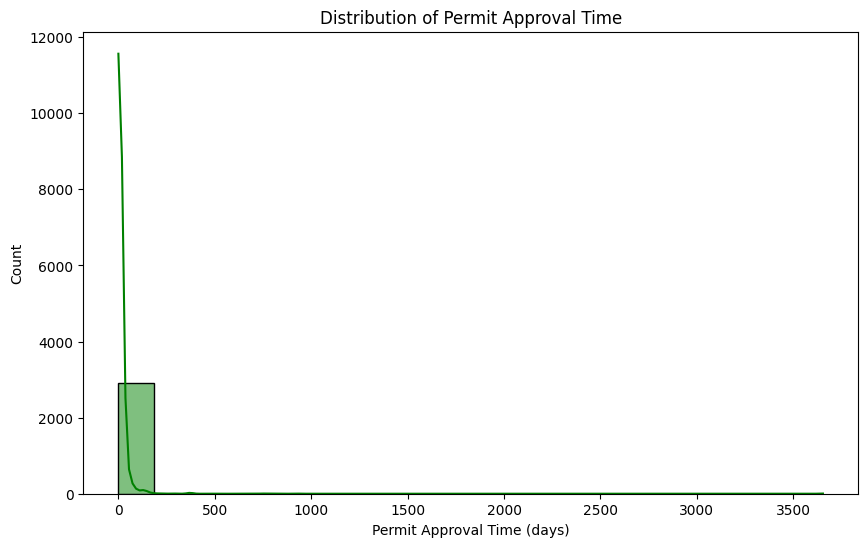

In [4]:
# distribution of permit approval time
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['approval_time'], kde=True, bins=20, color='g')
plt.title('Distribution of Permit Approval Time')
plt.xlabel('Permit Approval Time (days)')
plt.ylabel('Count')
plt.show()

In [ ]:
# # remove outliers in approval time
# df = df[df['approval_time'] < 400]
# df = df[df['approval_time'] > 1]

# plt.figure(figsize=(8, 4))
# sns.histplot(df['approval_time'], kde=True, bins=20, color='g')
# plt.title('Distribution of Permit Approval Time')
# plt.xlabel('Permit Approval Time (days)')
# plt.ylabel('Count')
# plt.show()

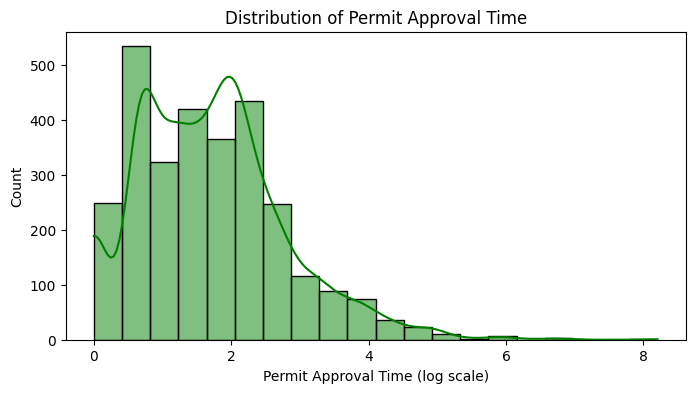

In [5]:
# transform the skewed distribution to a normal distribution
# using log transformation

# transform approval time to log scale
df['approval_time_log'] = np.log(1+df['approval_time'])

plt.figure(figsize=(8, 4))
sns.histplot(df['approval_time_log'], kde=True, bins=20, color='g')
plt.title('Distribution of Permit Approval Time')
plt.xlabel('Permit Approval Time (log scale)')
plt.ylabel('Count')
plt.show()



In [6]:
df.head(5)

,number_of_units,longitude,latitude,construction,demolition,renovation,residential,commercial,other,industrial,governmental,habitation,approval_time,approval_time_log
0,1.0,-73.869902,45.505224,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.098612
1,0.0,-73.873945,45.501934,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.693147
2,-1.0,-73.930681,45.492434,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,47.0,3.871201
3,0.0,-73.930681,45.492434,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,47.0,3.871201
4,1.0,-73.930681,45.492434,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,47.0,3.871201


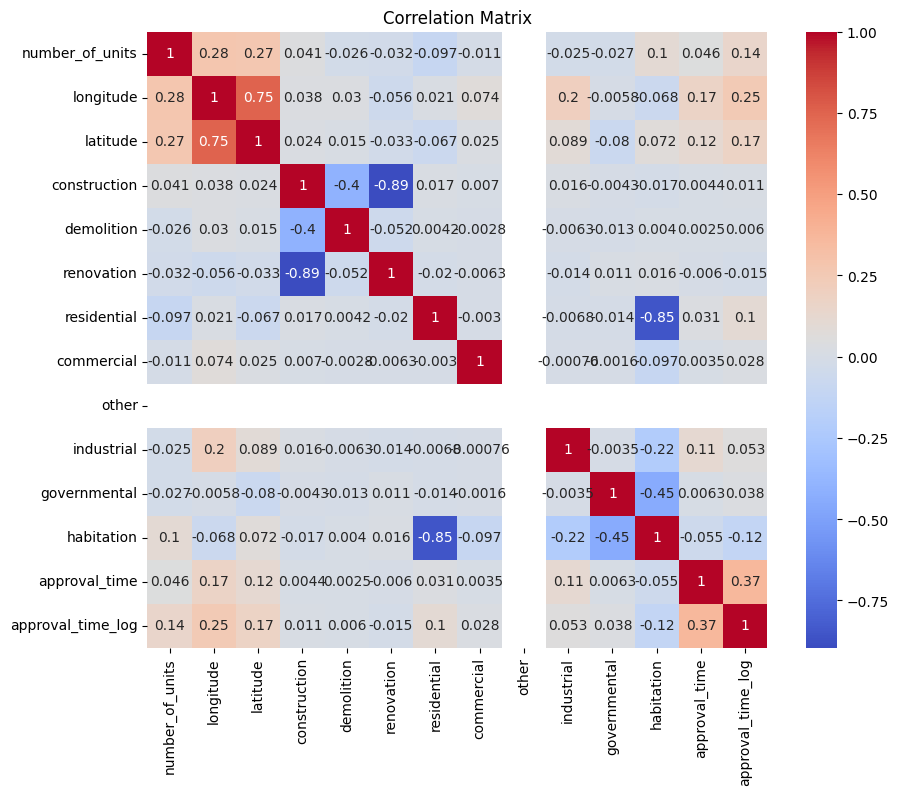

In [8]:
# obtain the correlation matrix
corr = df.corr()
# print(corr)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [9]:
# create two dataframes; one with all others and approval time and one with all others and log approval time
new_df = df.drop(['approval_time_log'], axis=1)
new_df_log = df.drop(['approval_time'], axis=1)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [11]:
# check nan values
# new_df.isnull().sum()
# new_df_log.isnull().sum()
new_df = new_df.dropna()
new_df_log = new_df_log.dropna()

In [12]:
# nan values in new_df_log
new_df_log.isnull().sum()

number_of_units      0
longitude            0
latitude             0
construction         0
demolition           0
renovation           0
residential          0
commercial           0
other                0
industrial           0
governmental         0
habitation           0
approval_time_log    0
dtype: int64

In [13]:
# Extract features (X) and target (y) columns
X, y = new_df_log.iloc[:, :-1], new_df_log.iloc[:, -1]


In [14]:
X.shape, y.shape

((2928, 12), (2928,))

In [15]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2635, 12) (293, 12) (2635,) (293,)


In [16]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [17]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
# from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor

# Lists to store information for later plotting
model_names = []
test_set_maes = []
cv_maes = []

# Extend the list of models
models = [
    ('Ridge Regression', Ridge(random_state=42)),
    ('Lasso Regression', Lasso(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsRegressor()),
    ('Decision Tree Regressor', DecisionTreeRegressor(random_state=42)),
    ('Random Forest Regressor', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting Regressor', GradientBoostingRegressor(random_state=42)),
    ('HistGradientBoostingRegressor', HistGradientBoostingRegressor(random_state=42)),
    # ('Support Vector Machine (SVR)', SVR()),
    ('MLP Regressor (Neural Network)', MLPRegressor(random_state=42)),
    ('AdaBoost Regressor', AdaBoostRegressor(random_state=42)),
    # ('Bagging Regressor', BaggingRegressor(random_state=42))
    ('XGBoost Regressor', XGBRegressor(random_state=42))
    
    
    
]


In [18]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

# Train and evaluate each model
for model_name, model in models:
    print(f"Training {model_name}...")
    
    # Train the model on the training set
    model.fit(X_train_scaled, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model's performance on the test set
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Mean Absolute Error on Test Set for {model_name}: {mae}')

    # Additional: Cross-validation scores
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
    print(f'Cross-Validation Mean MAE for {model_name}: {-cv_scores.mean()}')
    
    print('\n' + '-'*50 + '\n')  # Separator for better readability
    
    # Store information for later plotting
    model_names.append(model_name)
    test_set_maes.append(mae)
    cv_maes.append(-cv_scores.mean())

Training Ridge Regression...
Mean Absolute Error on Test Set for Ridge Regression: 0.8129534187153812
Cross-Validation Mean MAE for Ridge Regression: 0.8289002197328671

--------------------------------------------------

Training Lasso Regression...
Mean Absolute Error on Test Set for Lasso Regression: 0.8483790771524148
Cross-Validation Mean MAE for Lasso Regression: 0.8488825182303786

--------------------------------------------------

Training K-Nearest Neighbors...
Mean Absolute Error on Test Set for K-Nearest Neighbors: 0.7969926319620112
Cross-Validation Mean MAE for K-Nearest Neighbors: 0.8106260285960918

--------------------------------------------------

Training Decision Tree Regressor...
Mean Absolute Error on Test Set for Decision Tree Regressor: 1.0520611796862496
Cross-Validation Mean MAE for Decision Tree Regressor: 1.0028583469233703

--------------------------------------------------

Training Random Forest Regressor...
Mean Absolute Error on Test Set for Random For

/Users/bhargobdeka/Desktop/Projects/Real-estate-ML/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/bhargobdeka/Desktop/Projects/Real-estate-ML/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-Validation Mean MAE for MLP Regressor (Neural Network): 0.8155290511721025

--------------------------------------------------

Training AdaBoost Regressor...
Mean Absolute Error on Test Set for AdaBoost Regressor: 0.8131676987982657
Cross-Validation Mean MAE for AdaBoost Regressor: 0.8592007411892674

--------------------------------------------------

Training XGBoost Regressor...
Mean Absolute Error on Test Set for XGBoost Regressor: 0.8050772536124944
Cross-Validation Mean MAE for XGBoost Regressor: 0.8302021032103692

--------------------------------------------------



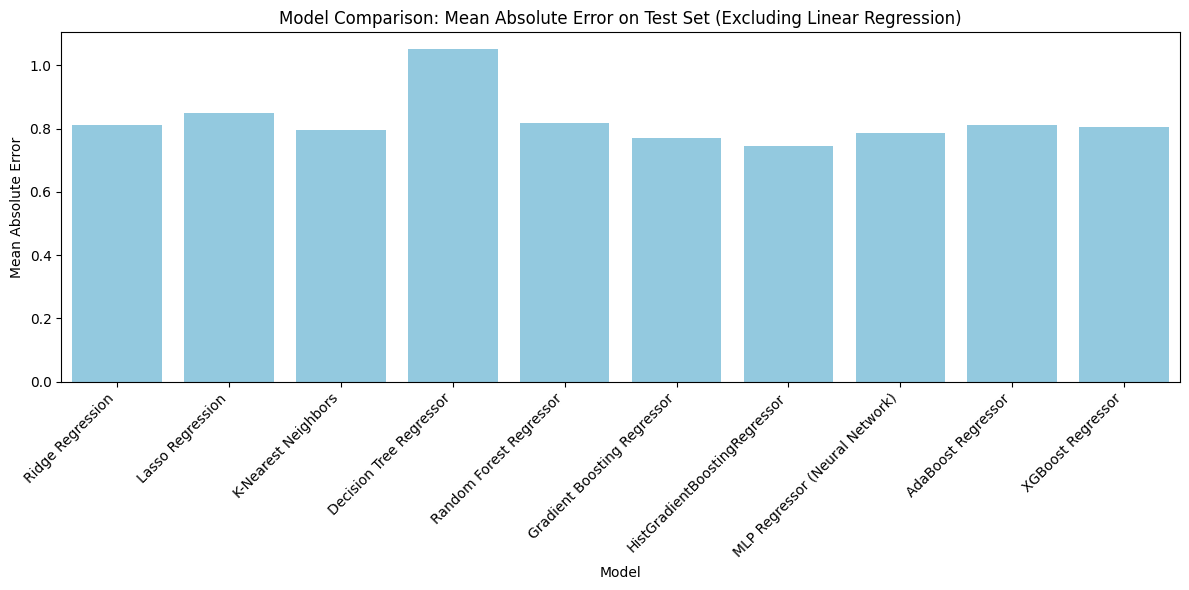

In [19]:
exclude_model = []
filtered_model_names = [name for name in model_names if name != exclude_model]
filtered_test_set_maes = [mae for name, mae in zip(model_names, test_set_maes) if name != exclude_model]
# Bar plot for model comparison (excluding 'Linear Regression')
plt.figure(figsize=(12, 6))
sns.barplot(x=filtered_model_names, y=filtered_test_set_maes, color='skyblue')
plt.title('Model Comparison: Mean Absolute Error on Test Set (Excluding Linear Regression)')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [20]:
# rank the models based on their performance
model_ranking = pd.DataFrame({'model_name': model_names, 'test_set_mae': test_set_maes, 'cv_mae': cv_maes})
model_ranking.sort_values(by='test_set_mae', inplace=True)
model_ranking.reset_index(drop=True, inplace=True)
model_ranking.index += 1
# model_ranking

# name of the best model
best_model_name = model_ranking.loc[1, 'model_name']

In [21]:
print(f'The best model is: {best_model_name}')

The best model is: HistGradientBoostingRegressor


In [22]:
# Find the index of the best model
best_model_index = next((index for index, (name, _) in enumerate(models) if name == best_model_name), None)

# Display the index
print("Index of the best model:", best_model_index)

Index of the best model: 6


In [23]:
# Get the best model
best_model = models[best_model_index][1]

In [24]:
# save the best model
import pickle
pickle.dump(best_model, open('../saved_model/trained_model.pkl', 'wb'))

Index(['number_of_units', 'longitude', 'latitude', 'construction',
       'demolition', 'renovation', 'residential', 'commercial', 'other',
       'industrial', 'governmental', 'habitation'],
      dtype='object')


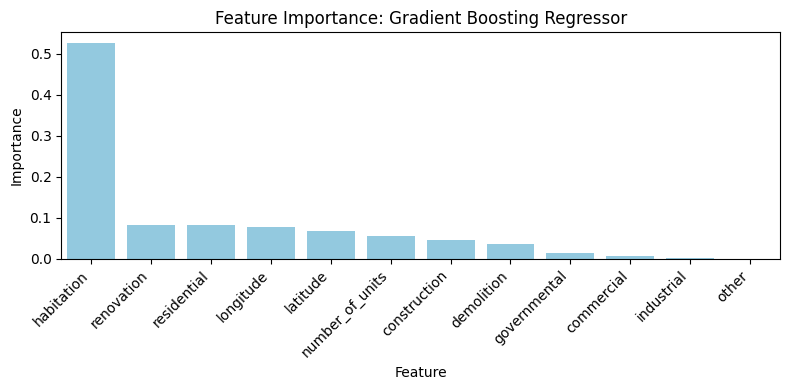

In [25]:
# Get feature importances from the Gradient Boosting Regressor
feature_importances = models[-1][1].feature_importances_

# Get the names of the features
feature_names = new_df_log.columns
feature_names = feature_names[:-1]
print(feature_names)
# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort values by importance
feature_importance_df.sort_values(by='Importance', inplace=True, ascending=False)

# plot feature importance
plt.figure(figsize=(8, 4))
sns.barplot(x='Feature', y='Importance', data=feature_importance_df, color='skyblue')
plt.title('Feature Importance: Gradient Boosting Regressor')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# models[5][1].feature_importances_
# gb = models[5][1]
# feature_importances = gb.feature_importances_
# feature_importances

In [ ]:
# residual plot
# plot the residuals
plt.figure(figsize=(8, 4))
sns.residplot(x=y_pred, y=y_test, color='skyblue')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [26]:
model_names

['Ridge Regression',
 'Lasso Regression',
 'K-Nearest Neighbors',
 'Decision Tree Regressor',
 'Ridge Regression',
 'Lasso Regression',
 'K-Nearest Neighbors',
 'Decision Tree Regressor',
 'Random Forest Regressor',
 'Gradient Boosting Regressor',
 'HistGradientBoostingRegressor',
 'MLP Regressor (Neural Network)',
 'AdaBoost Regressor',
 'XGBoost Regressor']

### Optimizing HistGradientBoostingRegressor Parameters

In [ ]:
# # optimize gradient boosting regressor
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_squared_error

# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'learning_rate': [0.01, 0.1, 0.2]
# }

# gb_reg = GradientBoostingRegressor(random_state=42)
# grid_search = GridSearchCV(gb_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# grid_search.fit(X_train_scaled, y_train)

# not worth it to run this code as it takes a long time to run

In [ ]:
# Display the best hyperparameters found
# best_params = grid_search.best_params_
# print(f'Best Hyperparameters: {best_params}')

# # Train the model with the best hyperparameters
# gb_reg_best = grid_search.best_estimator_
# gb_reg_best.fit(X_train_scaled, y_train)


In [ ]:
# Make predictions on the test set
# y_pred = gb_reg_best.predict(X_test_scaled)

# # Evaluate the model's performance on the test set
# mae = mean_absolute_error(y_test, y_pred)
# print(f'Mean Absolute Error on Test Set: {mae}')

In [ ]:
# # optimize SVM model using grid search
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVR

# # Define the parameter grid
# param_grid = [
#     {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]},
#     {'kernel': ['rbf'], 'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}
# ]

# # Instantiate the grid search
# grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)

# # Train the grid search
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# grid_search.best_params_

# # Get the best estimator
# grid_search.best_estimator_

# # Get the best score
# grid_search.best_score_

# # Get the results in a dataframe
# cv_results = pd.DataFrame(grid_search.cv_results_)
# cv_results

